In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv
/kaggle/input/summeranalytics2020/train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [4]:
attrition_df = pd.read_csv("/kaggle/input/summeranalytics2020/train.csv")
test_df = pd.read_csv("/kaggle/input/summeranalytics2020/test.csv")

In [5]:
test_df2 = pd.DataFrame(test_df)

In [6]:
attrition_df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [7]:
attrition_df.shape

(1628, 29)

In [8]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

In [9]:
attrition_df["Attrition"].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

In [10]:
attrition_df["Behaviour"].value_counts()

1    1628
Name: Behaviour, dtype: int64

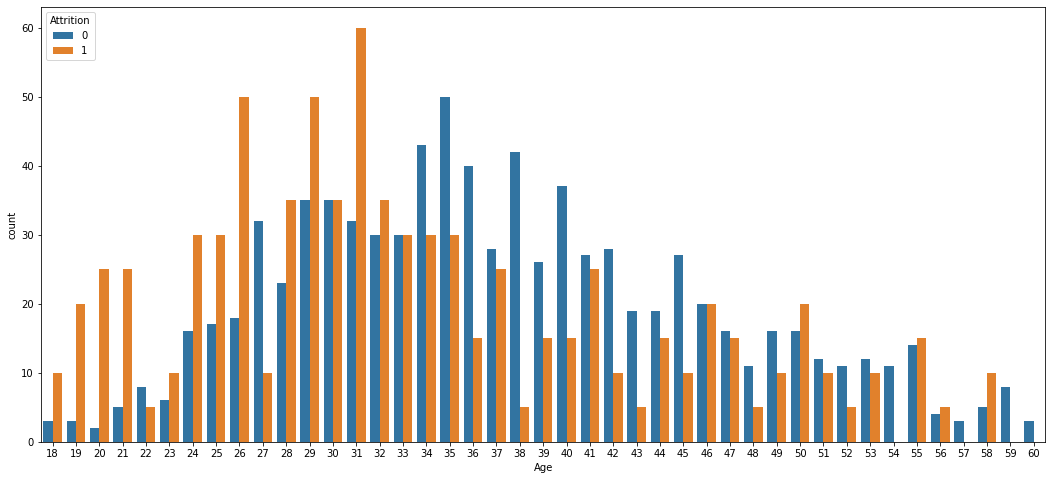

In [11]:
fig = plt.figure(figsize = (18,8))
sns.countplot(x='Age', hue='Attrition',data=attrition_df)
plt.show()

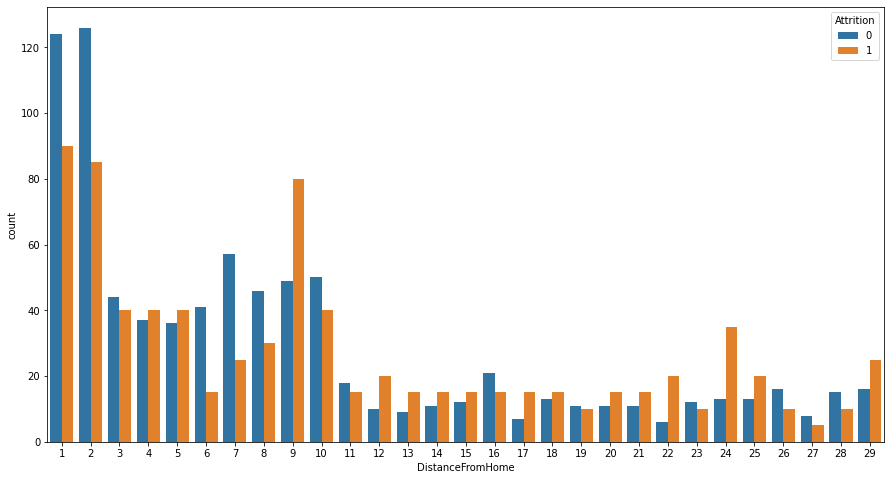

In [12]:
fig = plt.figure(figsize = (15,8))
sns.countplot(x='DistanceFromHome', hue='Attrition',data=attrition_df)
plt.show()

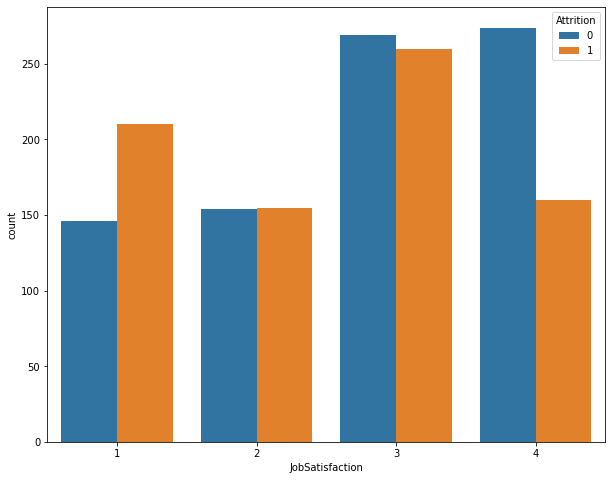

In [13]:
fig = plt.figure(figsize = (10,8))
sns.countplot(x='JobSatisfaction', hue='Attrition',data=attrition_df)
plt.show()

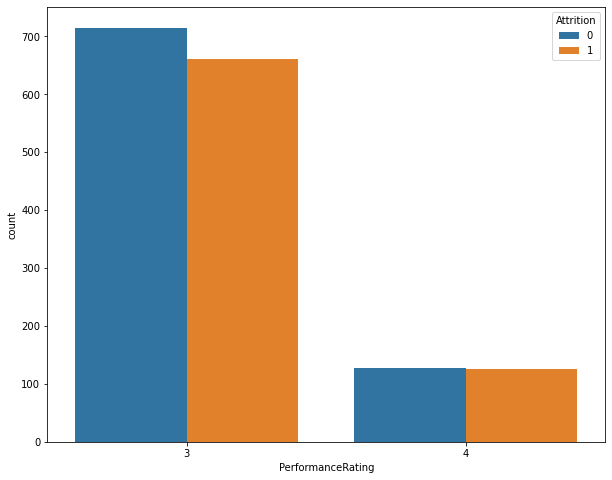

In [14]:
fig = plt.figure(figsize = (10,8))
sns.countplot(x='PerformanceRating', hue='Attrition',data=attrition_df)
plt.show()

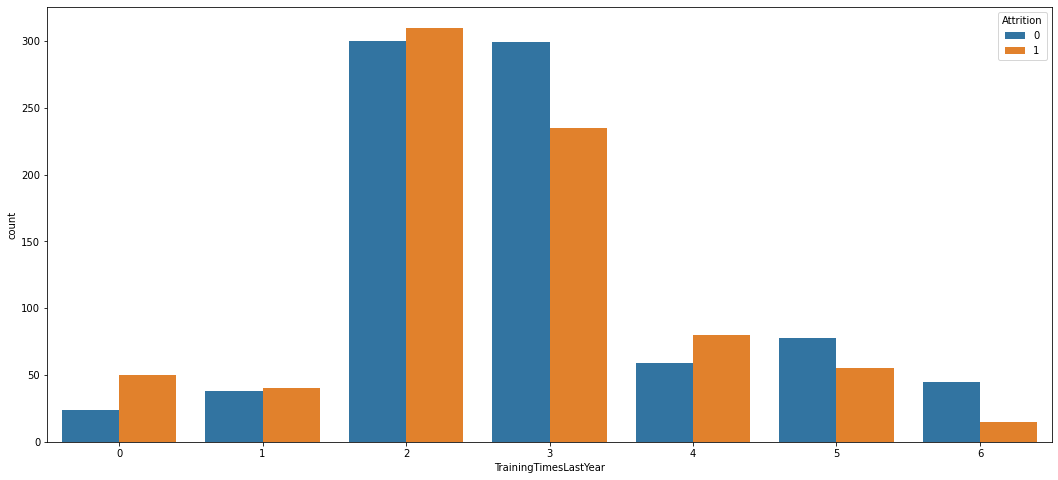

In [15]:
fig = plt.figure(figsize = (18,8))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition',data=attrition_df)
plt.show()

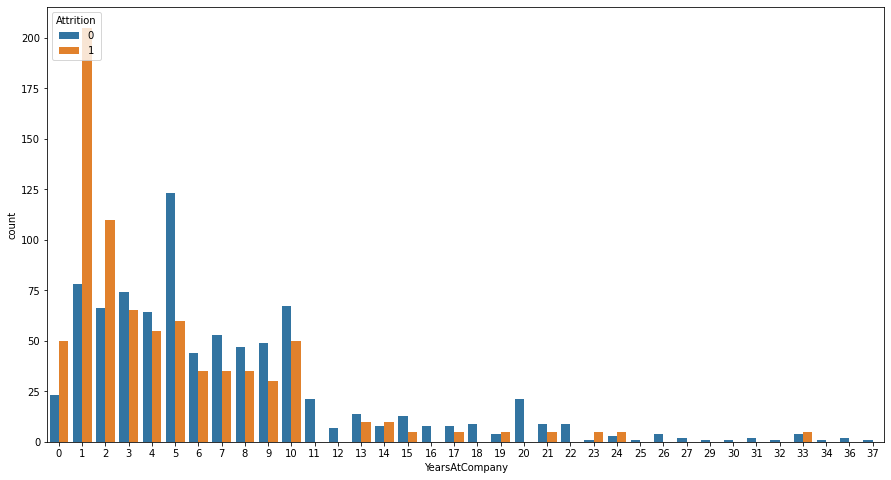

In [16]:
fig = plt.figure(figsize = (15,8))
sns.countplot(x='YearsAtCompany', hue='Attrition',data=attrition_df)
plt.show()

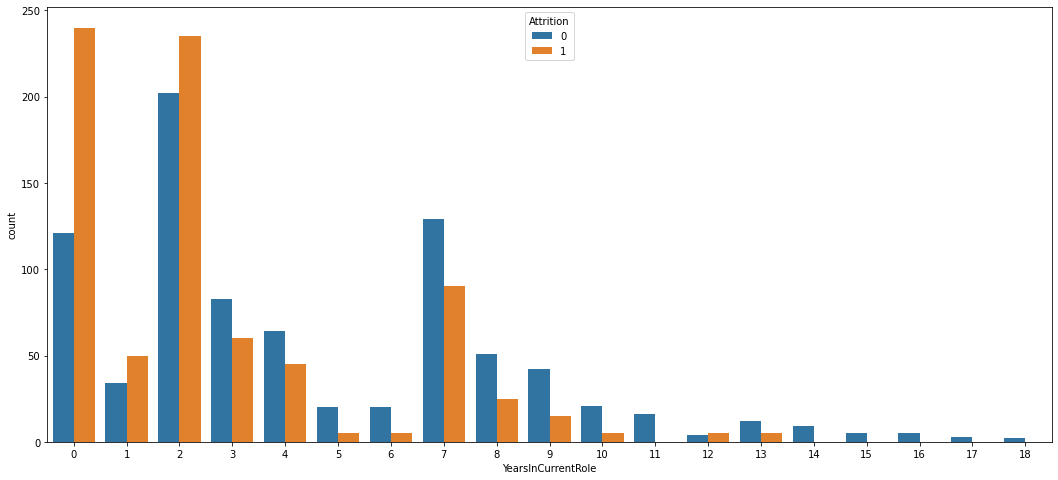

In [17]:
fig = plt.figure(figsize = (18,8))
sns.countplot(x='YearsInCurrentRole', hue='Attrition',data=attrition_df)
plt.show()

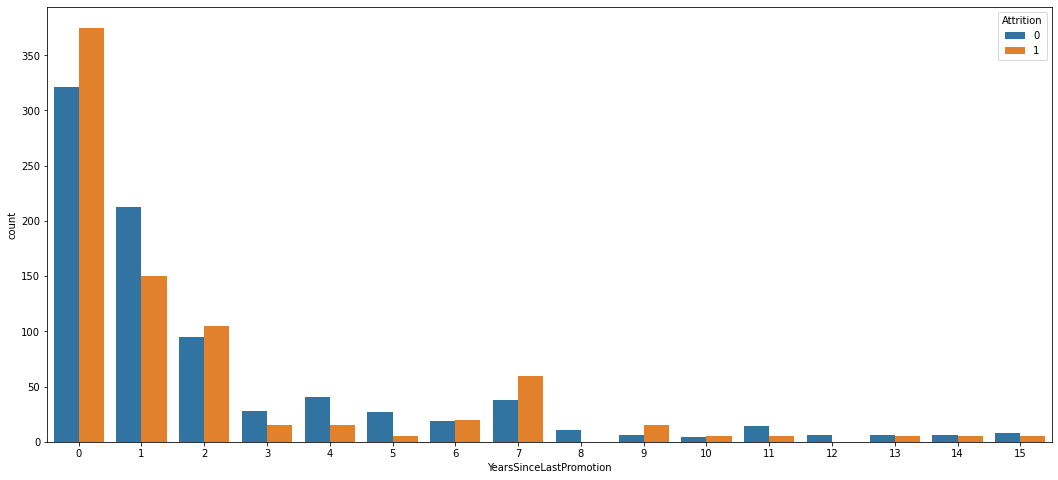

In [18]:
fig = plt.figure(figsize = (18,8))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition',data=attrition_df)
plt.show()

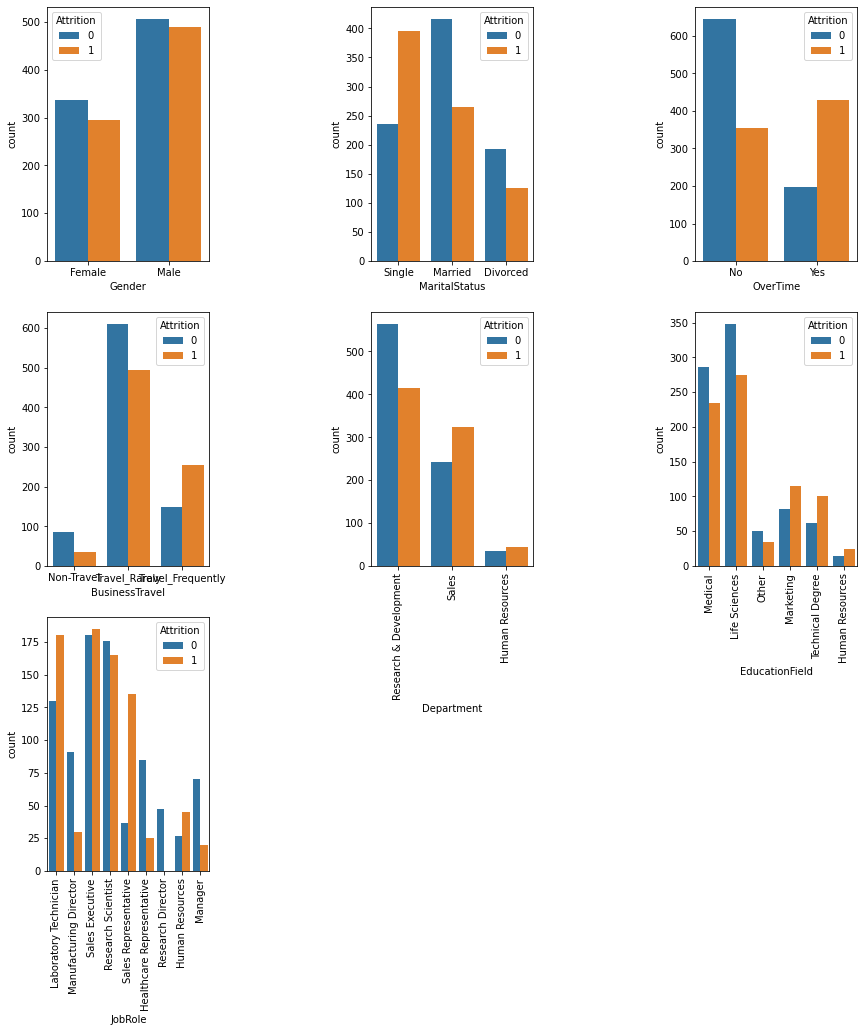

In [19]:
total_records = len(attrition_df)
columns = ['Gender','MaritalStatus','OverTime','BusinessTravel','Department','EducationField','JobRole']
j=0
for i  in columns:
    j+=1
    plt.subplot(3,3,j)
    ax1 = sns.countplot(data=attrition_df, x= i , hue="Attrition")
    if(j==5 or j==6 or j==7):
        plt.xticks(rotation=90)
plt.subplots_adjust(bottom=1,top=4,right=2.0,wspace=1.0)
plt.show()

In [20]:
attrition_df.drop(['Id','EmployeeNumber','StockOptionLevel','PerformanceRating','Behaviour','TrainingTimesLastYear','CommunicationSkill'],axis=1,inplace=True)
test_df2.drop(['Id','EmployeeNumber','StockOptionLevel','PerformanceRating','Behaviour','TrainingTimesLastYear','CommunicationSkill'],axis=1,inplace=True)

In [21]:
attrition_df.shape

(1628, 22)

In [22]:
test_df2.shape

(470, 21)

In [23]:
attrition_train = pd.DataFrame(attrition_df)
attrition_train = attrition_train.drop("Attrition",axis=1)

In [24]:
X = pd.get_dummies(attrition_train)
test = pd.get_dummies(test_df2)

In [25]:
X.shape

(1628, 42)

In [26]:
test.shape

(470, 42)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1628 non-null   int64
 1   DistanceFromHome                   1628 non-null   int64
 2   Education                          1628 non-null   int64
 3   EnvironmentSatisfaction            1628 non-null   int64
 4   JobInvolvement                     1628 non-null   int64
 5   JobSatisfaction                    1628 non-null   int64
 6   MonthlyIncome                      1628 non-null   int64
 7   NumCompaniesWorked                 1628 non-null   int64
 8   PercentSalaryHike                  1628 non-null   int64
 9   TotalWorkingYears                  1628 non-null   int64
 10  YearsAtCompany                     1628 non-null   int64
 11  YearsInCurrentRole                 1628 non-null   int64
 12  YearsSinceLastPromot

In [28]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X

array([[0.28571429, 0.03571429, 0.5       , ..., 1.        , 1.        ,
        0.        ],
       [0.42857143, 0.39285714, 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [0.88095238, 0.03571429, 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.16666667, 0.28571429, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.26190476, 0.42857143, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.26190476, 0.60714286, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [29]:
scaler = MinMaxScaler()
scaler.fit(test)
test=scaler.transform(test)
test

array([[0.23809524, 0.28571429, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.30952381, 0.17857143, 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.17857143, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14285714, 0.78571429, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.30952381, 0.78571429, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.42857143, 0.14285714, 0.75      , ..., 0.        , 1.        ,
        0.        ]])

In [30]:
Y = attrition_df.values[:,1]

In [31]:
Y

array([0, 0, 1, ..., 1, 1, 1], dtype=object)

In [32]:
Y= Y.astype(int)

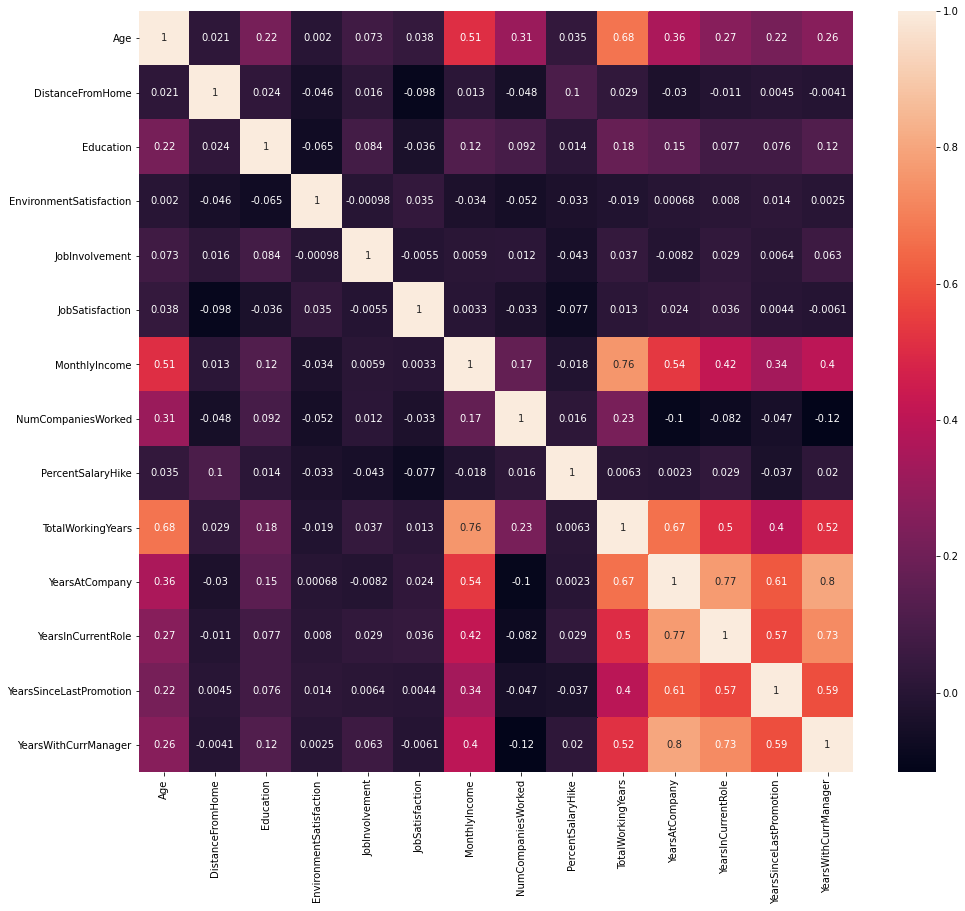

In [33]:
f,ax = plt.subplots(figsize=(16,14))
corrmat = attrition_train.corr()
sns.heatmap(corrmat,annot=True,
           xticklabels=corrmat.columns.values,
           yticklabels=corrmat.columns.values)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1139, 42)
(489, 42)
(1139,)
(489,)


In [36]:
from sklearn.model_selection import cross_val_score
classifier_reg = LogisticRegression(solver='lbfgs',max_iter=5000,C=0.5,penalty='l2',random_state=42)
scores_reg = cross_val_score(classifier_reg, X, Y, cv=10, scoring='roc_auc')
classifier_reg.fit(X_train,Y_train)

LogisticRegression(C=0.5, max_iter=5000, random_state=42)

In [37]:
Y_pred_Log = classifier_reg.predict_proba(X_test)[:,1]

In [38]:
metrics.roc_auc_score(Y_test,Y_pred_Log)

0.854717613541143

In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_Log)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.854717613541143

Text(0.5, 0, 'False Positive Rate')

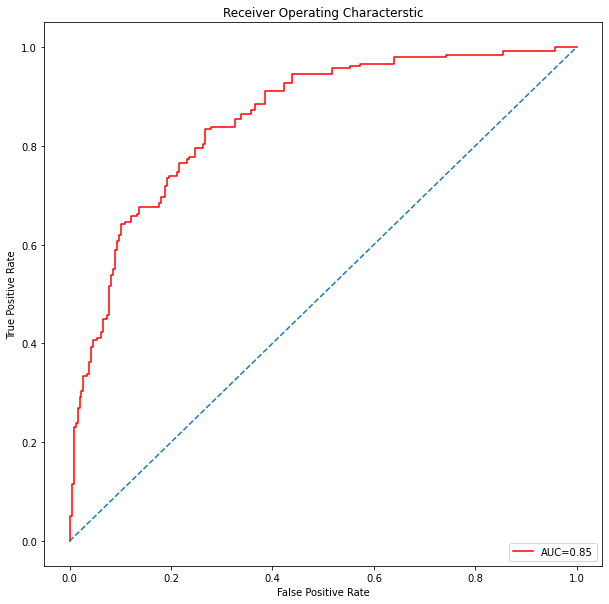

In [40]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [41]:
classifier_rf = RandomForestClassifier(n_estimators=100,
                                      max_features=0.3,
                                      max_depth=4,
                                      min_samples_leaf=2)
scores_rf = cross_val_score(classifier_rf, X, Y, cv=10, scoring='roc_auc')
classifier_rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2)

In [42]:
Y_pred_rf = classifier_rf.predict_proba(X_test)[:,1]

In [43]:
metrics.roc_auc_score(Y_test,Y_pred_rf)

0.8553544494720966

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8553544494720966

Text(0.5, 0, 'False Positive Rate')

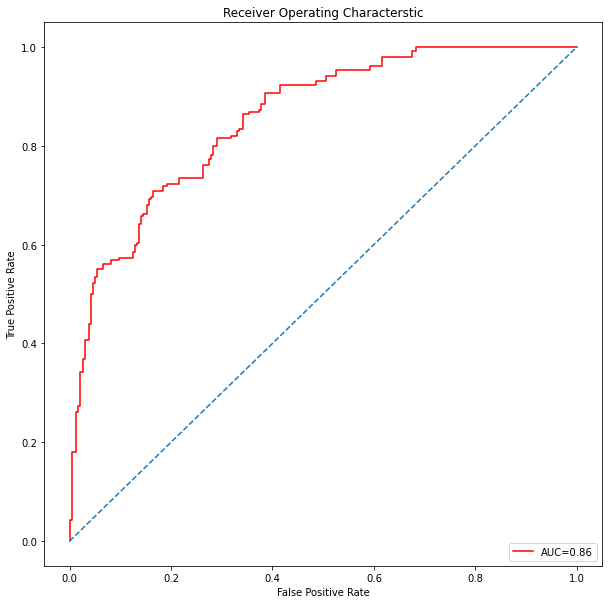

In [45]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [46]:
classifier_svm = SVC(kernel='rbf',gamma='auto', degree=3,probability=True)
scores_svm = cross_val_score(classifier_svm, X, Y, cv=10, scoring='roc_auc')
classifier_svm.fit(X_train,Y_train)

SVC(gamma='auto', probability=True)

In [47]:
Y_pred_svm = classifier_svm.predict_proba(X_test)[:,1]

In [48]:
metrics.roc_auc_score(Y_test,Y_pred_svm)

0.8426512485336014

In [49]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8426512485336014

Text(0.5, 0, 'False Positive Rate')

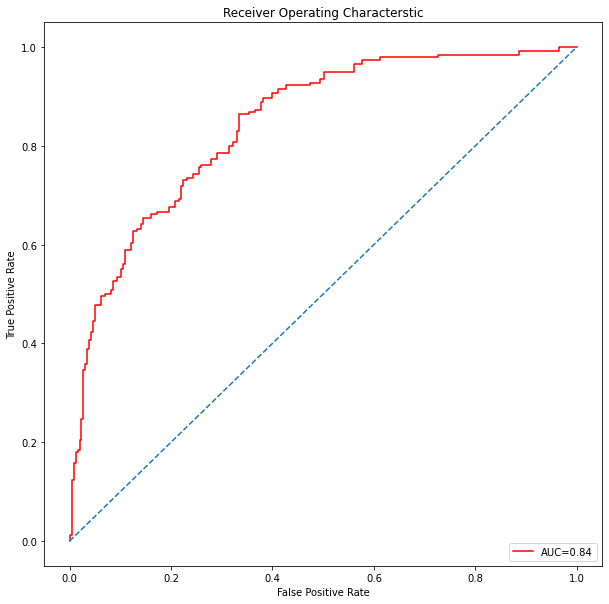

In [50]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [51]:
classifier_gbm = xgb.XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.7,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=300,
                      reg_alpha = 0.75,
                      max_depth=3,
                      gamma=0.01,
                      random_state=42,
                      seed=42)
scores_gbm = cross_val_score(classifier_gbm, X, Y, cv=10, scoring='roc_auc')
eval_set = [(X_test, Y_test)]
classifier_gbm.fit(X_train,Y_train, eval_metric="auc", eval_set=eval_set,early_stopping_rounds=15, verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0.75, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
Y_predtrain_XGboost = classifier_gbm.predict_proba(X_train)[:,1]
Y_pred_XGboost = classifier_gbm.predict_proba(X_test)[:,1]

In [53]:
print(metrics.roc_auc_score(Y_train,Y_predtrain_XGboost))
print(metrics.roc_auc_score(Y_test,Y_pred_XGboost))

0.9997314715359829
0.9784816490698843


In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_XGboost)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9784816490698843

Text(0.5, 0, 'False Positive Rate')

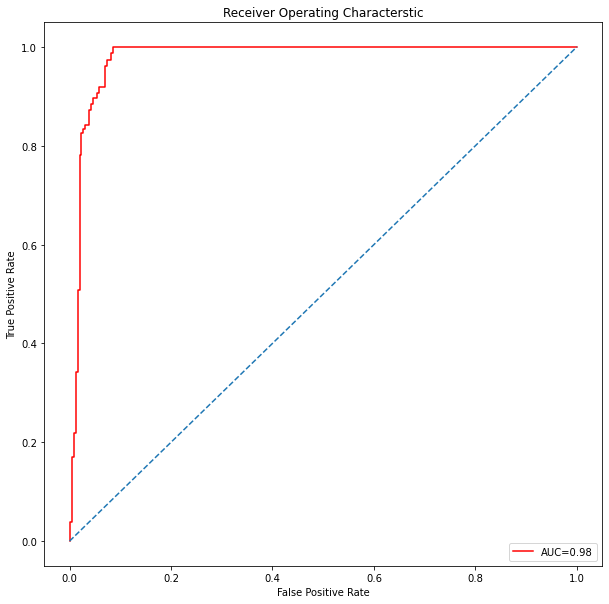

In [55]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The optimal number of neighbors is  1 


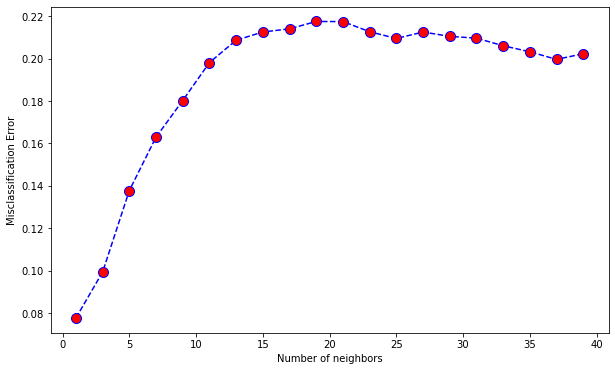

In [56]:

from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, Y_train, cv = 10, scoring = 'roc_auc')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()  


In [57]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(X_train, Y_train) 

KNeighborsClassifier(n_neighbors=1)

In [58]:
Y_pred_knn = knn.predict_proba(X_test)[:,1]

In [59]:
metrics.roc_auc_score(Y_test,Y_pred_knn)

0.9235294117647059

In [60]:
print(np.average(scores_reg))
print(np.average(scores_rf))
print(np.average(scores_svm))
print(np.average(scores_gbm))

0.8650124759413664
0.8707490747029094
0.8622485037507375
0.988956232606642


In [61]:
test_preds = classifier_gbm.predict_proba(test)[:,1]
output = pd.DataFrame({'Id': test_df.Id,'Attrition': test_preds})
output.to_csv('submission.csv', index=False)